# Overfitting and regularization

In this notebook we will look at various techniques to avoid overfitting.

We will start out by using the IMDB binary classification example from last time (ch 4 of the book). So let set that up and train the baseline model from last time.

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [4]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [5]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7049 - loss: 0.6058 - val_accuracy: 0.8605 - val_loss: 0.4081
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8880 - loss: 0.3552 - val_accuracy: 0.8820 - val_loss: 0.3209
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9187 - loss: 0.2546 - val_accuracy: 0.8850 - val_loss: 0.2941
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9311 - loss: 0.2101 - val_accuracy: 0.8885 - val_loss: 0.2760
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9452 - loss: 0.1736 - val_accuracy: 0.8822 - val_loss: 0.2881
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9521 - loss: 0.1466 - val_accuracy: 0.8794 - val_loss: 0.2980
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9651 - loss: 0.1241 - val_accuracy: 0.8883 - val_loss: 0.2899
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9665 - loss: 0.1096 - val_accuracy: 0.8857 - v

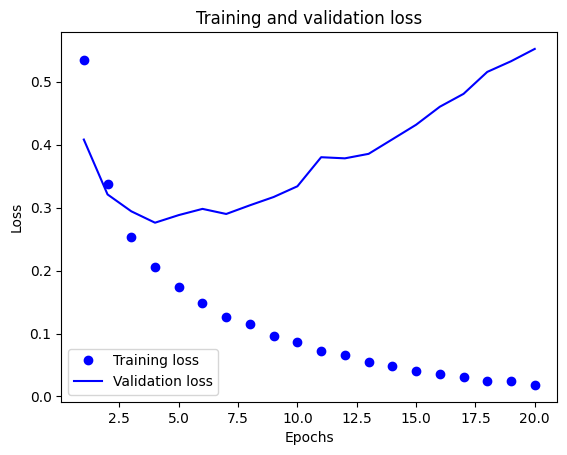

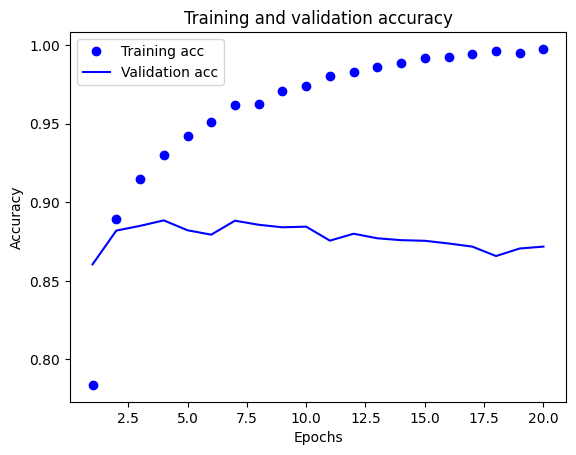

In [6]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7300 - loss: 0.5699
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9047 - loss: 0.2849
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9253 - loss: 0.2148
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9371 - loss: 0.1813
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8749 - loss: 0.3112
Test accuracy: 0.874


## Early stopping

We can manually inspect the loss graph and stop the model when it reaches it min loss (here 4 epoch) or we can more systematically keep the model with the lowest validation loss using the ModelCheckpoint callback from Keras. First we set up callbacks.

In [8]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="imbd_overfitting_ex.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [9]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.6985 - loss: 0.5945 - val_accuracy: 0.8322 - val_loss: 0.4237
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8904 - loss: 0.3380 - val_accuracy: 0.8761 - val_loss: 0.3218
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9170 - loss: 0.2505 - val_accuracy: 0.8919 - val_loss: 0.2823
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9384 - loss: 0.1926 - val_accuracy: 0.8918 - val_loss: 0.2751
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9488 - loss: 0.1646 - val_accuracy: 0.8880 - val_loss: 0.2767
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9592 - loss: 0.1370 - val_accuracy: 0.8659 - val_loss: 0.3392
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9645 - loss: 0.1181 - val_accuracy: 0.8779 - val_loss: 0.3223
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9691 - loss: 0.1037 - val_accuracy: 0.8854 - v

Now we can retreive the best model and evaluate it.

In [11]:
test_model = keras.models.load_model("imbd_overfitting_ex.keras")
test_loss, test_acc = test_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8789 - loss: 0.2918
Test accuracy: 0.883


This corresponds to the best model we could have manually gotten.

## Weight regularization

Let us try to add weight regularization in the form of L1 and L2 regularization

In [12]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, activation="relu",
                kernel_regularizer=regularizers.l2(0.003)),
    layers.Dense(16, activation="relu",
                kernel_regularizer=regularizers.l2(0.003)),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5592 - loss: 0.7816 - val_accuracy: 0.8412 - val_loss: 0.6191
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8589 - loss: 0.5622 - val_accuracy: 0.8746 - val_loss: 0.4651
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8963 - loss: 0.4178 - val_accuracy: 0.8799 - val_loss: 0.4069
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9173 - loss: 0.3519 - val_accuracy: 0.8834 - val_loss: 0.3876
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9241 - loss: 0.3238 - val_accuracy: 0.8830 - val_loss: 0.3843
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9249 - loss: 0.3085 - val_accuracy: 0.8847 - val_loss: 0.3795
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9300 - loss: 0.2944 - val_accuracy: 0.8833 - val_loss: 0.3777
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9377 - loss: 0.2805 - val_accuracy: 0.8656 - v

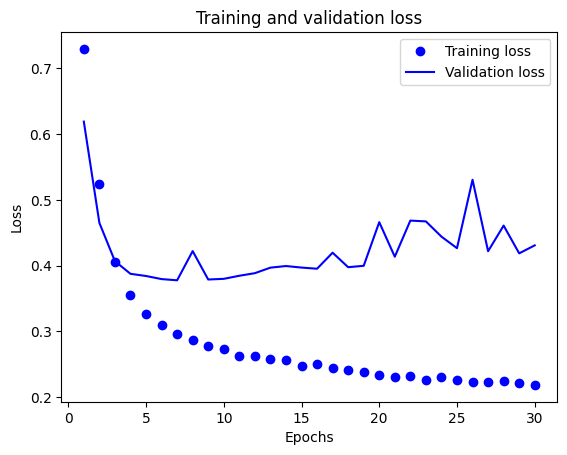

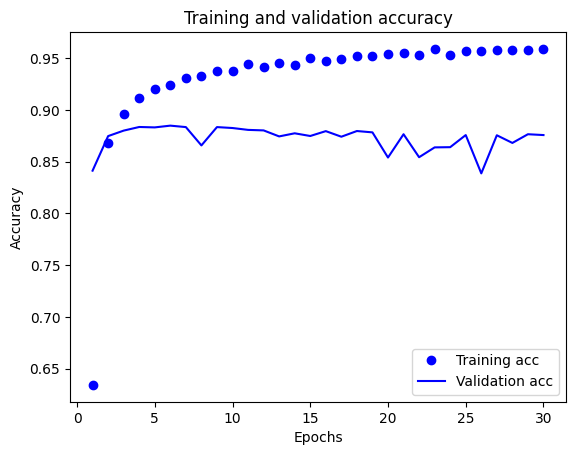

In [14]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We see that the model starts to overfit later much later and to a less degree

We refit it on 6 epochs.

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu",
                kernel_regularizer=regularizers.l2(0.003)),
    layers.Dense(16, activation="relu",
                kernel_regularizer=regularizers.l2(0.003)),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=6,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6976 - loss: 0.7252 - val_accuracy: 0.8659 - val_loss: 0.4965
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8942 - loss: 0.4409 - val_accuracy: 0.8824 - val_loss: 0.4137
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9129 - loss: 0.3628 - val_accuracy: 0.8710 - val_loss: 0.4108
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9194 - loss: 0.3277 - val_accuracy: 0.8831 - val_loss: 0.3830
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9376 - loss: 0.2922 - val_accuracy: 0.8813 - val_loss: 0.3816
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9312 - loss: 0.2904 - val_accuracy: 0.8821 - val_loss: 0.3790


And test it:

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8759 - loss: 0.3928
Test accuracy: 0.878


In this case, we did not managed to get a better model though.

## Dropout

We can also try to add dropout after each layer.

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.6106 - loss: 0.6507 - val_accuracy: 0.8477 - val_loss: 0.5054
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7753 - loss: 0.5066 - val_accuracy: 0.8543 - val_loss: 0.4114
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8345 - loss: 0.4235 - val_accuracy: 0.8835 - val_loss: 0.3390
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8757 - loss: 0.3577 - val_accuracy: 0.8845 - val_loss: 0.3032
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8982 - loss: 0.3145 - val_accuracy: 0.8896 - val_loss: 0.2804
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9052 - loss: 0.2866 - val_accuracy: 0.8882 - val_loss: 0.2819
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9239 - loss: 0.2415 - val_accuracy: 0.8882 - val_loss: 0.2779
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9351 - loss: 0.2079 - val_accuracy: 0.8893 - v

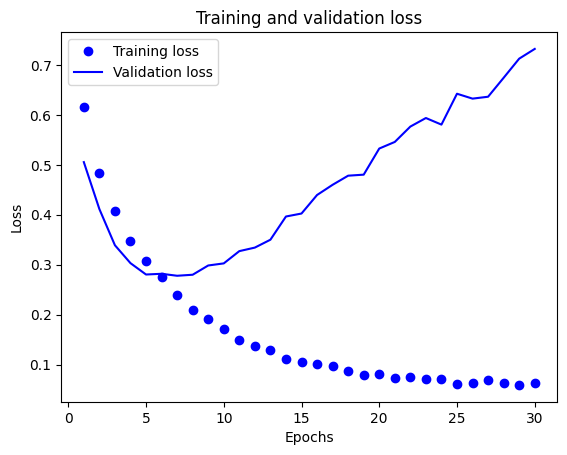

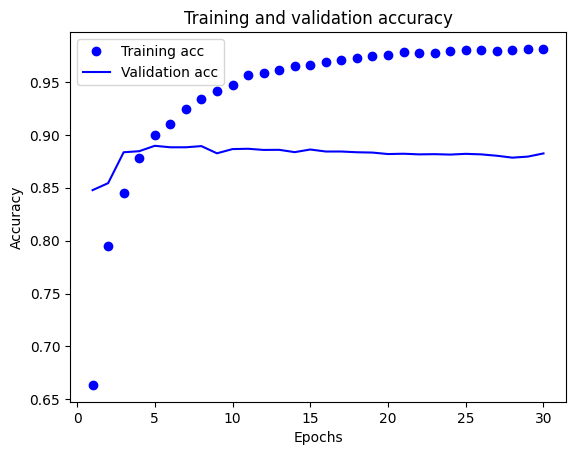

In [18]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Again we see a later and less extreme overfitting. Let us retrain the model on 7 epochs and test it.

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=7,
                    batch_size=512,
                    validation_data=(x_val, y_val))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5702 - loss: 0.6717 - val_accuracy: 0.8376 - val_loss: 0.5399
Epoch 2/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7492 - loss: 0.5489 - val_accuracy: 0.8612 - val_loss: 0.4189
Epoch 3/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8277 - loss: 0.4417 - val_accuracy: 0.8773 - val_loss: 0.3540
Epoch 4/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8627 - loss: 0.3782 - val_accuracy: 0.8827 - val_loss: 0.3092
Epoch 5/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8892 - loss: 0.3245 - val_accuracy: 0.8836 - val_loss: 0.2985
Epoch 6/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9048 - loss: 0.2872 - val_accuracy: 0.8832 - val_loss: 0.2782
Epoch 7/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9197 - loss: 0.2475 - val_accuracy: 0.8853 - val_loss: 0.2746
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8784 - loss: 0.2908
Test accuracy: 0.880


Again, we did not manage to get a much better model in the end. It might suggest that overfitting is not as much of a problem for this model to begin with.

## Data augmentation

Data augmentation is something we usually do for computer vision models, so we need to look at the example of cats vs dogs again.

In [21]:
from tensorflow.keras.utils import image_dataset_from_directory
path = "../Notebooks and data-15/dogs_vs_cats_tiny/dogs_vs_cats_tiny"
train_dataset = image_dataset_from_directory(
    path + "/train",# how to concat?
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
     path + "/validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
     path + "/test",
    image_size=(180, 180),
    batch_size=32)

NotFoundError: Could not find directory ../Notebooks and data-15/dogs_vs_cats_tiny/dogs_vs_cats_tiny/dogs_vs_cats_tiny/train

In [20]:
c_and_d_model = keras.Sequential(
    [
        keras.Input(shape=(180, 180, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

c_and_d_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
history = c_and_d_model.fit(
    train_dataset,
    epochs=8,  # I have already checked when to stop...
    validation_data=validation_dataset)

In [ ]:
test_loss, test_acc = c_and_d_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

To do data augmentation in keras we can add data augmentation layers to the start of our model. Here is an example of such data augmentation layers.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),   # Applies horizontal flipping to a random 50% of the images that go through it
        layers.RandomRotation(0.1),        # Rotates the input images by a random value in the range [–10%, +10%] (these are
                                           # fractions of a full circle—in degrees, the range would be [–36 degrees, +36 degrees])
        layers.RandomZoom(0.2),            # Zooms in or out of the image by a random factor in the range [-20%, +20%]
    ]
)

Here is an example of how the images will look.

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Let us retrain the cat vs dog model again with this data augmenation layers at the beginning.

In [ ]:
c_and_d_model_w_aug = keras.Sequential(
    [
        keras.Input(shape=(180, 180, 3)),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

c_and_d_model_w_aug.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

As we now expect less overfitting we will also train our model for a longer time.

In [ ]:
history = c_and_d_model_w_aug.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Before we started to overfit around 8 epochs and now we haven't quite overfitted yet at 30 epochs.

Let us now evaluate it on the test dataset.

In [ ]:
test_loss, test_acc = c_and_d_model_w_aug.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

We see a clear improvement here! And if we made sure fit until the point just before overfitting, we might be able to do even better...

Now let us add it all together. That is, let us train the model with data augmentation, dropout and early stopping using callbacks.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="cat_vs_dogs_final.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
c_and_d_model_final = keras.Sequential(
    [
        keras.Input(shape=(180, 180, 3)),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)

c_and_d_model_final.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

As we expect much less overfitting we will also train for even longer now.

In [ ]:
history = c_and_d_model_final.fit(
    train_dataset,
    epochs=60,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

We see that we do not overfit until we reach close to 60 epochs.

Let us now test the best model.

In [ ]:
test_model = keras.models.load_model("cat_vs_dogs_final.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

We now see a significant improvement over the baseline model!